<a href="https://colab.research.google.com/github/gshreya5/colab/blob/main/Wonder_wine_hurrey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🔎 Goal

To build a predictive model for forecasting the wine's variety based on feedback from customers.

# 📝 Import Libraries


In [186]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 📝 LOAD DATASET



In [189]:
#https://docs.google.com/spreadsheets/d/1fJJnJrxIYB4JPh_9XBOzci3wIv-GFstrscVlGJDNxd0/edit#gid=2027694107

#https://docs.google.com/spreadsheets/d/1r0InGx-I414XAXc2cd34dgSVSGS8mSasVw5prW6tyW8/edit#gid=501117877

train_url = "https://docs.google.com/spreadsheets/d/1fJJnJrxIYB4JPh_9XBOzci3wIv-GFstrscVlGJDNxd0/export?format=csv&gid=2027694107"
test_url = "https://docs.google.com/spreadsheets/d/1r0InGx-I414XAXc2cd34dgSVSGS8mSasVw5prW6tyW8/export?format=csv&gid=501117877"

train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

# 📝 Let's explore our Dataset

In [190]:
#reads first five rows
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardonnay (South Eastern Australia),"Classic Chardonnay aromas of apple, pear and hay lead into a palate marked by decent intensity but also a bit of sweetness. Orange and candy notes run through the rather short finish.",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (WA)),"This wine is near equal parts Syrah and Merlot with the balance Cabernet Sauvignon. Aromas of blue fruit, vanilla, cherry and herb lead to full-bodied pit-fruit flavors that bring a sense of deliciousness that is hard to resist.",NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),"Barolo Conca opens with inky dark concentration and soothing aromas of black fruit, spice, cola, plum, prune and dried lavender buds. The nose presents those ethereal and delicate aromas, but in the mouth, it delivers thicker flavors of chocolate and mocha. Drink after 2018.",Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (Bergerac Sec),"It's impressive what a small addition of Sauvignon Gris and Muscadelle can do to a Sauvignon-Sémillon blend—it turns this into an exotic wine, with spice and lychee flavors.",L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec (Vin de Liqueur),"This ripe, sweet wine is rich and full of dried and fresh fruit flavors. It is spicy, with a touch of spirit on the palate as well as bold black-plum fruit, dense tannins and a sweet aftertaste. Drink from 2017.",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [191]:
# Set the maximum column width
pd.set_option('display.max_colwidth', None)

There's Nan values will need to deal with those

In [192]:
train.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery', 'variety'],
      dtype='object')

# Data Description


● user_name - user_name of the reviewer

● country -The country that the wine is from.

● review_title - The title of the wine review, which often contains the vintage.

● review_description - A verbose review of the wine.

● designation - The vineyard within the winery where the grapes that made the
wine are from.

● points - ratings given by the user. The ratings are between 0 -100.

● price - The cost for a bottle of the wine

● province - The province or state that the wine is from.

● region_1 - The wine-growing area in a province or state (ie Napa).

● region_2 - Sometimes there are more specific regions specified within a
wine-growing area (i.e. Rutherford inside the Napa Valley), but this value can
sometimes be blank.

● winery - The winery that made the wine

● variety - The type of grapes used to make the wine.

In [193]:
train.shape, test.shape

((82657, 12), (20665, 11))

In [194]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [195]:
train.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


 * The average points for the wines is 88.54, ranging from 80 to 100 on scale, indicating that on average, wines are good.
 * Std of approx $43.70 indicates a wide variation in wine prices

In [196]:
train.describe(include = object)

,user_name,country,review_title,review_description,designation,province,region_1,region_2,winery,variety
count,63264,82622,82657,82657,59010,82622,69903,35949,82657,82657
unique,15,38,76983,77628,26423,358,1019,17,13786,28
top,@vossroger,US,Korbel NV Brut Sparkling (California),"This single-vineyard Barolo shows ripe berry aromas and whiffs of incense and espresso. The palate shows almost overripe cherry fruit, layered with herbs, coffee and underbrush notes. It has big but ripe tannins and is fast approaching optimum drinkability. Enjoy it over the next few years.",Reserve,California,Napa Valley,Central Coast,Testarossa,Pinot Noir
freq,17539,38573,8,2,1382,25736,3334,7503,175,10587


 * Provinces: The reviews rate wines from 358 unique provinces.

 * Winery: "Testarossa" is the winery with the highest number of reviews (7,503).

 * Variety: "Pinot Noir" is the most frequently mentioned wine variety, with 10,587 occurrences.

In [197]:
train['country'].unique()

array(['Australia', 'US', 'Italy', 'France', 'Argentina', 'New Zealand',
       'Austria', 'Chile', 'Portugal', 'Germany', 'Spain', nan, 'Israel',
       'England', 'Brazil', 'South Africa', 'Romania', 'Slovenia',
       'Greece', 'Canada', 'Turkey', 'Lebanon', 'Mexico', 'Uruguay',
       'Bulgaria', 'Hungary', 'Moldova', 'Morocco', 'Georgia', 'Ukraine',
       'Croatia', 'Peru', 'Switzerland', 'Luxembourg', 'Cyprus',
       'Czech Republic', 'Macedonia', 'Serbia', 'India'], dtype=object)

In [198]:
train['variety'].unique()

array(['Chardonnay', 'Red Blend', 'Nebbiolo',
       'Bordeaux-style White Blend', 'Malbec', 'Cabernet Sauvignon',
       'Zinfandel', 'Pinot Noir', 'Sauvignon Blanc', 'Gamay',
       'Grüner Veltliner', 'Bordeaux-style Red Blend', 'Sangiovese',
       'Syrah', 'White Blend', 'Cabernet Franc', 'Portuguese Red',
       'Portuguese White', 'Rhône-style Red Blend', 'Rosé',
       'Champagne Blend', 'Merlot', 'Riesling', 'Sparkling Blend',
       'Pinot Grigio', 'Tempranillo', 'Pinot Gris', 'Gewürztraminer'],
      dtype=object)

# 📝 Clean data

In [219]:
train.isna().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

Lots of empty values, 'user_name' won't really affect 'variety' much so dropping it











In [220]:
train = train.drop(columns=['user_name'])
test = test.drop(columns=['user_name'])

# 📝 Visualization

### Variety

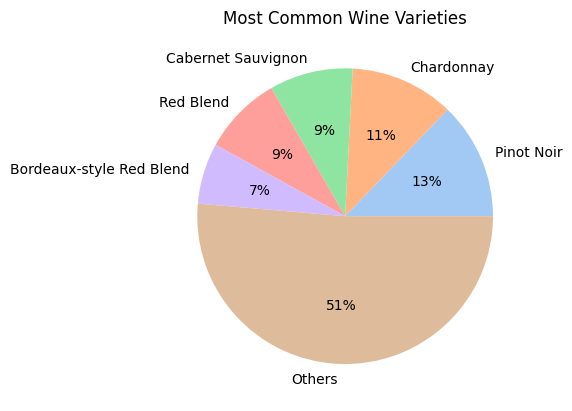

In [309]:
tmp = train['variety'].value_counts(normalize=True).head()
tmp.loc['Others'] = 1 - (tmp.sum())

colors = sns.color_palette('pastel')[0:6]

plt.pie(tmp, labels = tmp.index, colors = colors, autopct='%.0f%%')

plt.title("Most Common Wine Varieties");

In [321]:
tmp = train['variety'].value_counts().idxmax()
print("Most common variety reviewed is: ", tmp)

Most common variety reviewed is:  Pinot Noir


### Price

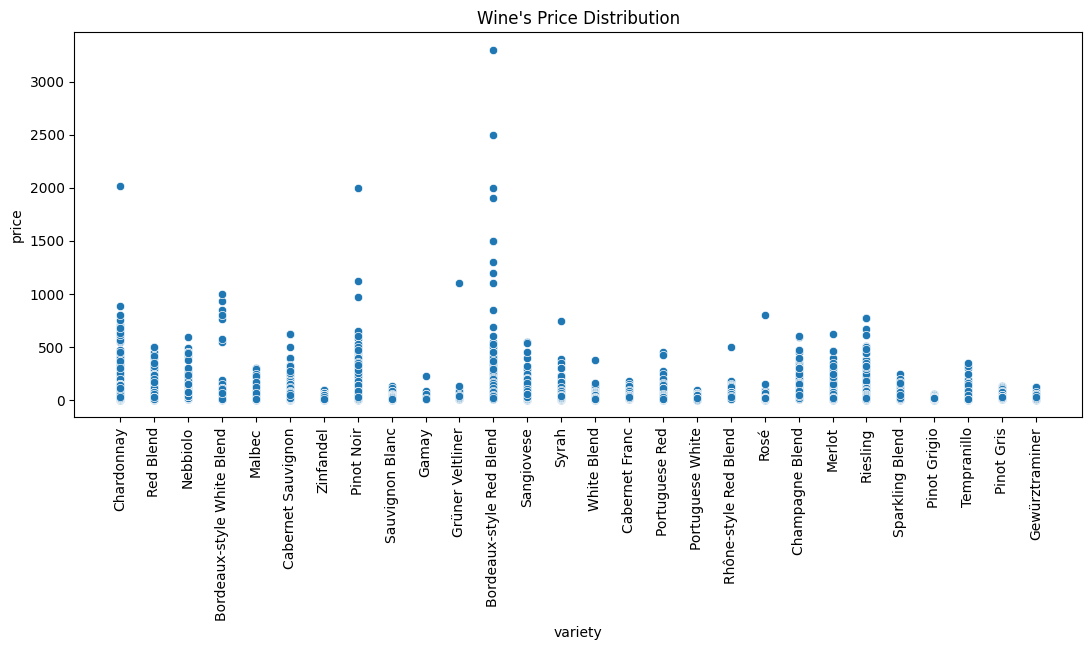

In [281]:
plt.figure(figsize=(13, 5))
sns.scatterplot(data=train, x='variety', y='price')
plt.title("Wine's Price Distribution")
plt.xticks(rotation=90);

Most expensive wine is  Bordeaux-style Red Blend, costs 3300 but the same variety is produced for all price brackets

### Country

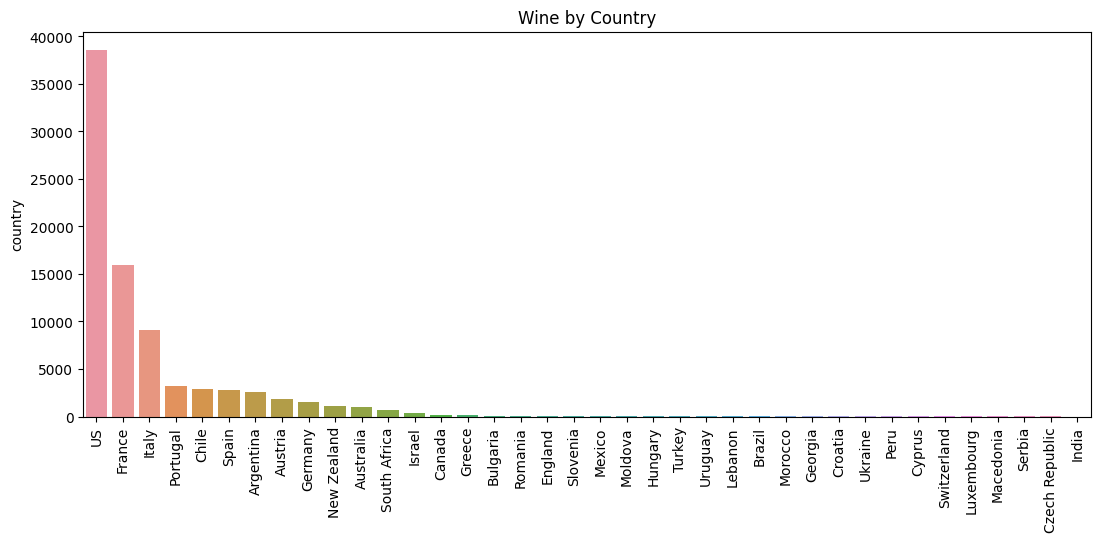

In [272]:
plt.figure(figsize=(13, 5))
tmp = train['country'].value_counts()
sns.barplot(x=tmp.index, y = tmp)
plt.title("Wine by Country")
plt.xticks(rotation=90);

US is the top producer of wine

US, France, Italy and Portugal seem to be dominating the market



### Province

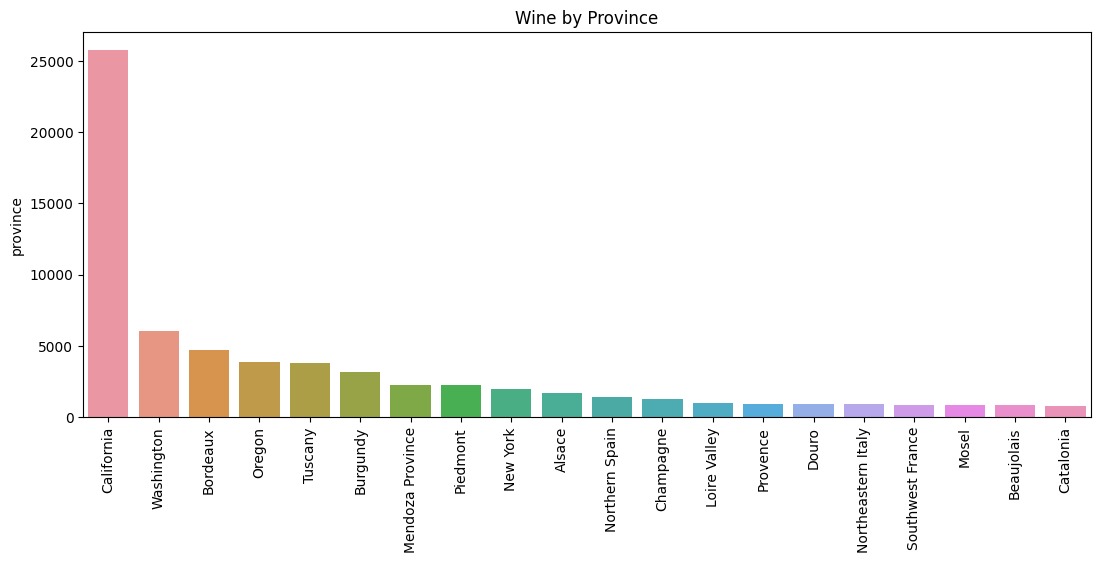

In [315]:
plt.figure(figsize=(13, 5))
tmp = train['province'].value_counts().head(20)
sns.barplot(x=tmp.index, y = tmp)
plt.title("Wine by Province")
plt.xticks(rotation=90);

###  Wineries that make the best wine

In [319]:
train[train.points == 100][['country','winery','variety','price']]

,country,winery,variety,price
2897,US,Cayuse,Syrah,80.0
3221,France,Château Lafite Rothschild,Bordeaux-style Red Blend,1500.0
11704,Italy,Tenuta dell'Ornellaia,Merlot,460.0
19993,France,Château Cheval Blanc,Bordeaux-style Red Blend,1500.0
20182,France,Château Haut-Brion,Bordeaux-style White Blend,848.0
27179,France,Château Léoville Barton,Bordeaux-style Red Blend,150.0
31572,Italy,Biondi Santi,Sangiovese,550.0
35492,France,Château Léoville Las Cases,Bordeaux-style Red Blend,359.0
41362,US,Cardinale,Cabernet Sauvignon,200.0
46864,France,Salon,Chardonnay,617.0


Best wineries are located in US, France, Italy and Portugal

Top rated wines range from 80 to 1500. Something for everyone.







# Summary
* France produces the most expensive wine, Bordeaux-style Red Blend
* US is the top producer of wine

* US, France, Italy and Portugal seem to be dominating the market in wine production and best wineries.
* Most common variety reviewed are:  Pinot Noir, Chardonnay, Cabernet Sauvignon, Red Blend, Bordeaux-style Red Blend

* Top rated wines range from 80 (Syrah) to 1500 (Bordeaux-style Red Blend) . Something for everyone.







# 📝 Preprocess Text

Since we are going to be predicting based on text reviews, let's concat all the necessary features

In [223]:
train.columns

Index(['country', 'review_title', 'review_description', 'designation',
       'points', 'price', 'province', 'region_1', 'region_2', 'winery',
       'variety'],
      dtype='object')

In [224]:
df = train.fillna(' ')
df['combined'] = df['country']+' '+df['review_title']+' '+df['review_description']+" "+df['designation']+' '+df['province']+' '+df['region_1']+' '+df['region_2']+' '+df['winery']

In [225]:
df = df[['combined','price','points','variety']]

In [226]:
df.isna().sum()

combined    0
price       0
points      0
variety     0
dtype: int64

In [227]:
df.head()

,combined,price,points,variety
0,"Australia Andrew Peace 2007 Peace Family Vineyard Chardonnay (South Eastern Australia) Classic Chardonnay aromas of apple, pear and hay lead into a palate marked by decent intensity but also a bit of sweetness. Orange and candy notes run through the rather short finish. Peace Family Vineyard Australia Other South Eastern Australia Andrew Peace",10.0,83,Chardonnay
1,"US North by Northwest 2014 Red (Columbia Valley (WA)) This wine is near equal parts Syrah and Merlot with the balance Cabernet Sauvignon. Aromas of blue fruit, vanilla, cherry and herb lead to full-bodied pit-fruit flavors that bring a sense of deliciousness that is hard to resist. Washington Columbia Valley (WA) Columbia Valley North by Northwest",15.0,89,Red Blend
2,"Italy Renato Ratti 2007 Conca (Barolo) Barolo Conca opens with inky dark concentration and soothing aromas of black fruit, spice, cola, plum, prune and dried lavender buds. The nose presents those ethereal and delicate aromas, but in the mouth, it delivers thicker flavors of chocolate and mocha. Drink after 2018. Conca Piedmont Barolo Renato Ratti",80.0,94,Nebbiolo
3,"France Domaine l'Ancienne Cure 2010 L'Abbaye White (Bergerac Sec) It's impressive what a small addition of Sauvignon Gris and Muscadelle can do to a Sauvignon-Sémillon blend—it turns this into an exotic wine, with spice and lychee flavors. L'Abbaye Southwest France Bergerac Sec Domaine l'Ancienne Cure",22.0,87,Bordeaux-style White Blend
4,"France Château du Cèdre 2012 Le Cèdre Vintage Malbec (Vin de Liqueur) This ripe, sweet wine is rich and full of dried and fresh fruit flavors. It is spicy, with a touch of spirit on the palate as well as bold black-plum fruit, dense tannins and a sweet aftertaste. Drink from 2017. Le Cèdre Vintage France Other Vin de Liqueur Château du Cèdre",33.0,88,Malbec


# Implement Bag of Words

## Create vocabulary and Configure text prepocessing using Count Vectorizer



In [148]:
from sklearn.feature_extraction.text import CountVectorizer

In [149]:
# text preprocessing
import nltk

# Step 1: word_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Step 2: stop_words removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

#Step 3: stemming
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [151]:
def text_preprocessor(text):
  return [SnowballStemmer(language='english').stem(word) for word in word_tokenize(text) if word not in stopwords]

In [228]:
vectorizer = CountVectorizer(lowercase=True, tokenizer = text_preprocessor, max_features=1000 )
vectorizer.fit(df.combined)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(max_features=1000,
                tokenizer=<function text_preprocessor at 0x7bab60837ac0>)

In [231]:
vectorizer.get_feature_names_out()

array(['%', '&', "'", "'s", '(', ')', ',', '.', '10', '100', '15', '1999',
       '20', '2000', '2001', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2015.',
       '2016', '2016.', '2017.', '2018.', '2019.', '2020.', '2022.', '25',
       '30', '40', '5', '50', ':', ';', 'accent', 'access', 'acid',
       'across', 'ad', 'add', 'addit', 'adig', 'africa', 'aftertast',
       'age', 'air', 'alcohol', 'alentejano', 'alexand', 'allow',
       'almond', 'almost', 'along', 'alongsid', 'alreadi', 'alsac',
       'also', 'alta', 'although', 'alto', 'alway', 'amador', 'amaron',
       'amount', 'ampl', 'anderson', 'anis', 'anoth', 'appeal', 'appear',
       'appel', 'appet', 'appl', 'approach', 'apricot', 'argentina',
       'aroma', 'aromat', 'around', 'arroyo', 'asian', 'assert',
       'astring', 'attract', 'ausles', 'auster', 'australia', 'austria',
       'back', 'backbon', 'background', 'bacon', 'bake', 'balanc',
       'balsam', 

### Transform text to vectors using Count Vectorizer

In [232]:
train_inputs = vectorizer.transform(df.combined)

In [325]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# Scale the numerical features (points and price)
scaler = StandardScaler()
numerical_features = scaler.fit_transform(df[['points', 'price']].replace(' ', 0))

# Combine vectors with numerical features
combined_features = hstack([train_inputs, numerical_features])

# 📝ML for Text Classification

### Split into train and test set

In [164]:
from sklearn.model_selection import train_test_split

In [326]:
train_feature, test_feature, train_target, test_target =  train_test_split(combined_features,df.variety, test_size = 0.2, random_state=42)

## Train a Logistic Regression model

In [166]:
from sklearn.linear_model import LogisticRegression

In [340]:
clf = LogisticRegression(max_iter = 1000, solver='sag' ).fit(train_feature, train_target)

## Predict on test data

In [350]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [351]:
accuracy_score(test_target,clf.predict(test_feature) )

0.9458020808129688

In [352]:
f1_score(test_target, clf.predict(test_feature) , average='weighted')

0.9457126544245089

In [342]:
# Create the confusion matrix
cm = confusion_matrix(test_target,clf.predict(test_feature) )

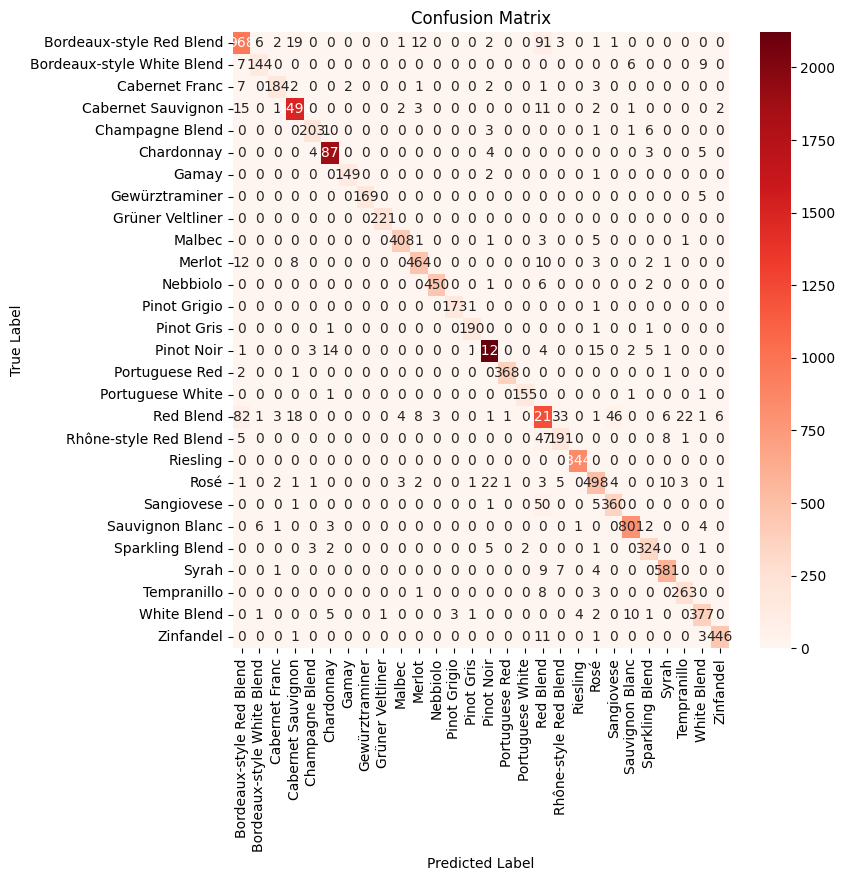

In [343]:
# Convert the confusion matrix into a DataFrame (optional, but helpful for visualization)
classes = np.unique(np.concatenate((test_target,clf.predict(test_feature))))  # Get all unique classes
confusion_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_df, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix');

# Submitting Predictions

In [344]:
df1 = test.fillna(' ')
df1['combined'] = df1['country']+' '+df1['review_title']+' '+df1['review_description']+" "+df1['designation']+' '+df1['province']+' '+df1['region_1']+' '+df1['region_2']+' '+df1['winery']

test_inputs = vectorizer.transform(df1.combined)
numerical_features1 = scaler.fit_transform(df1[['points', 'price']].replace(' ', 0))

combined_features1 = hstack([test_inputs, numerical_features1])


In [345]:
variety_res = clf.predict(combined_features1)

In [346]:
test['variety'] = variety_res


In [347]:
test.head()

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,US,Boedecker Cellars 2011 Athena Pinot Noir (Willamette Valley),"Nicely differentiated from the companion Stewart bottling, this Athena is a sharp and spicy affair, with tight, tart cranberry and raspberry fruit. Native yeast fermentation and extended sur-lie aging add some snap to the finish. Try after 2016 for optimum enjoyment.",Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Pinot Noir
1,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard Bonvin Malbec (Mendoza),"Charred, smoky, herbal aromas of blackberry trend in the direction of exotic before showing barrel-driven scents of vanilla and clove. This exhibits plenty of depth and sponginess along with toasty, herbal flavors of plum and blackberry. Pepper, burnt toast, clove and blueberry flavors carry the finish on this hefty Malbec; drink through 2021.",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,Malbec
2,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a restrained white aged in a majority of stainless steel, in addition to smaller percentages of oak and acacia. Crisp and minerally, marked by stone fruit as well as citrus, it finishes rich in caramel and vanilla.",NaN,87,38.0,California,Coombsville,Napa,Prime,Chardonnay
3,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Selection Malbec (Mendoza),"This concentrated, midnight-black Malbec delivers the aromatic goods in the form of charcoal, grilled meat and blackberry scents. An extracted palate benefits from core acidity, while black cherry, cassis and blackberry flavors come to rest on a rich but controlled finish. Drink through 2018.",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,Malbec
4,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leather, tilled soil and balsam lead the nose. The dense, chewy palate offers mature black cherry, raspberry, licorice and dried sage flavors, set against a tannic backdrop that needs time to soften. A tobacco note signals the close. Drink 2022–2032.",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,Sangiovese


In [349]:
test.to_csv('submissions.csv')

Score may be improved further by using Random Forest, Gradient Boosting or neural networks.